# 1-Importing Libraries~~

In [220]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime

# 2-Loading the dataset and getting an overview of data~~

In [221]:
#importing the dataset
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [223]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# 3-Dealing with missing data~~

<Axes: >

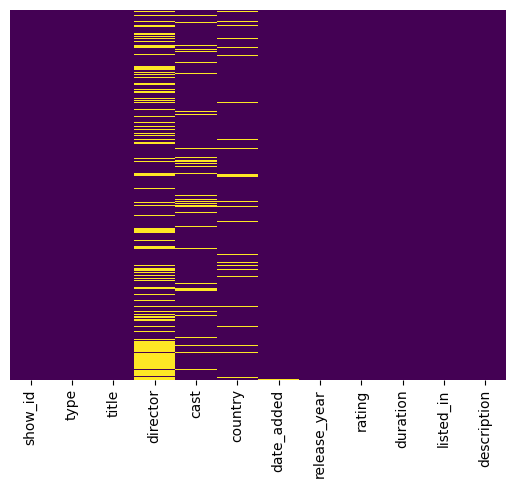

In [224]:
#plotting null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [225]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [226]:
# filling null values of director column with unknown
df["director"].fillna("unknown", inplace=True)

In [227]:
# filling null values of cast column with mode
df["cast"].fillna(df["cast"].mode()[0], inplace=True)
df["country"].fillna(df["country"].mode()[0], inplace=True)
df["rating"].fillna(df["rating"].mode()[0], inplace=True)

In [228]:
#dropping null values in date_added column
df.dropna(subset=["date_added"], inplace=True)

# 4-Visualizing the trends and patterns in dataset~~

In [229]:
#checking unique values in all columns
df.nunique()

show_id         6223
type               2
title           6162
director        3302
cast            5459
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6215
dtype: int64

Text(0.5, 1.0, 'percentage breakdown of movies and tv shows')

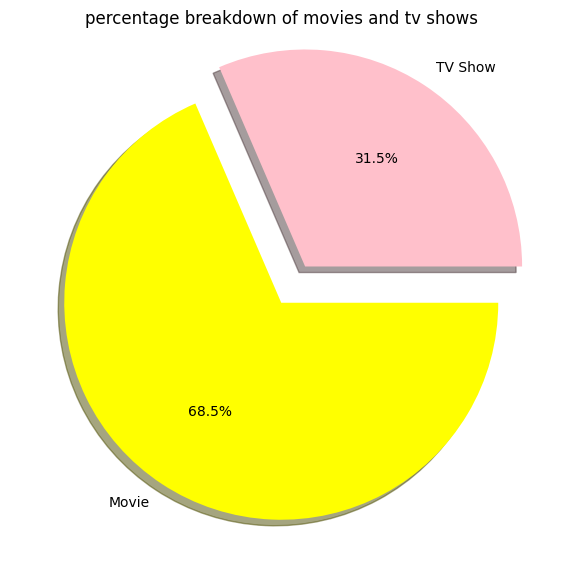

In [230]:
#percentage breakdown of movies and tv shows
prctage=df["type"].value_counts()
plt.figure(figsize=(7, 8))
plt.pie(prctage, labels=prctage.index, autopct="%1.1f%%", counterclock=False, explode=(0, 0.2), shadow=True, colors=["yellow", "pink"])   
plt.title("percentage breakdown of movies and tv shows")

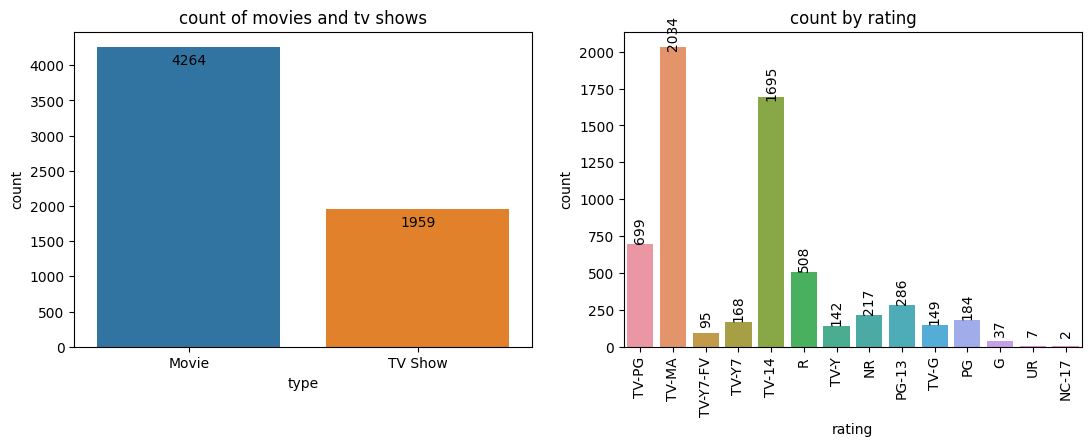

In [231]:
#creating visulaizations to illustrate the count of movies and tv shows, and the count by rating
import matplotlib.pyplot as plt
plt.figure(figsize=(13,9))

plt.subplot(2,2,1)
plot=sns.countplot(x="type",data=df)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, -10), textcoords = 'offset points')
plt.title("count of movies and tv shows")


plt.subplot(2,2,2)
plot=sns.countplot(x="rating", data=df)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=90)
plt.title("count by rating")
plt.xticks(rotation=90)
plt.show()

In [232]:
df["rating"].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', 'UR', 'NC-17'], dtype=object)

**In the context of a Netflix recommendation system, these entries in rating column represent different content ratings assigned to TV shows and movies. Each rating corresponds to a specific audience category, indicating the appropriateness of the content for different age groups. Here's what each rating means:**
* TV-PG: Parental Guidance suggested. Some material may not be suitable for children.
* TV-MA: Mature Audience. Content is specifically designed to be viewed by adults and therefore may not be suitable for children  under 17.
* TV-Y7-FV: Directed to older children. Fantasy Violence.
* TV-Y7: Suitable for children 7 and older.
* TV-14: Parents are urged to learn more about the show before taking their children to see it. Content may contain some material  that parents might not like for their children under 14.
* R: Restricted. Restricted to viewers over the age of 17 or 18. Parents are urged to learn more about the movie before taking their children to see it. 
* TV-Y: Designed to be appropriate for all children.
* NR: Not Rated. The content rating is not specified.
* PG-13: Parents strongly urged to give "parental guidance." Some material may be inappropriate for children under 13.
* TV-G: Suitable for all ages.
* PG: Parental Guidance suggested. Some material may not be suitable for children.
* G: General Audiences. All ages are admitted. There is no content that would offend parents if viewed by children.
* UR: Unrated. The content rating is not specified.
* NC-17: No one 17 and under admitted. Content is very explicit and not suitable for minors.

**The visualization above shows that TV-MA rating is highest. It means that most of the content is designed for mature people.**

In [233]:
df["release_year"].unique()

array([2019, 2016, 2013, 2017, 2014, 2015, 2009, 2012, 2010, 2018, 2011,
       2004, 2000, 1983, 1982, 2006, 2005, 2002, 1997, 2008, 2007, 2003,
       1981, 1991, 1994, 1988, 1976, 1973, 1974, 1989, 1986, 1984, 1978,
       1998, 1972, 1979, 1960, 1959, 2001, 1995, 1992, 1990, 1975, 1985,
       1980, 1970, 1996, 1967, 1999, 1987, 1968, 1993, 2020, 1958, 1965,
       1956, 1962, 1955, 1977, 1945, 1946, 1942, 1944, 1947, 1943, 1969,
       1954, 1966, 1971, 1964, 1925, 1963], dtype=int64)

In [234]:
#creating a new column year from date_added column
df["year"]=df["date_added"].str.split(",").str[1]
len(df["year"])

6223

In [235]:
#making a new dataset containg data of movies category
movies=df[df["type"]=="Movie"]

In [236]:
#making a new dataset containg data of TVshows category
TVshows=df[df["type"]=="TV Show"]

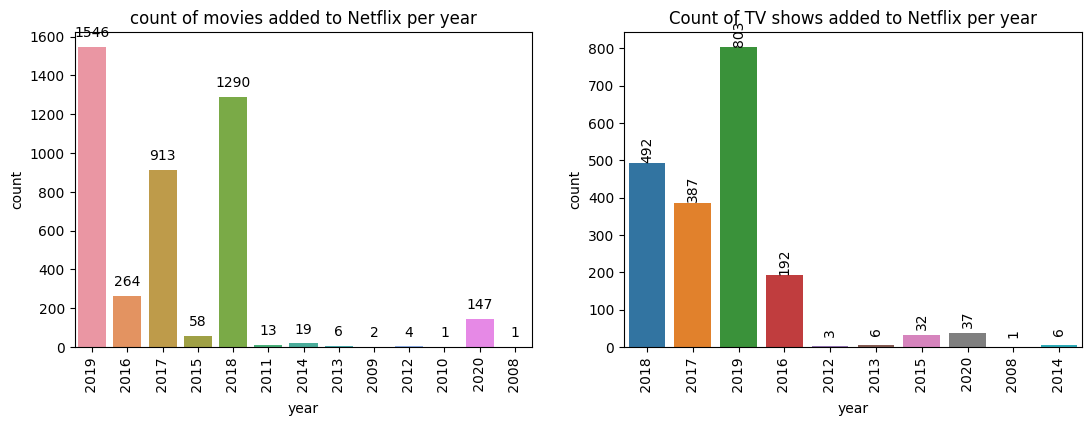

In [237]:
#visulaizing the year column illustrating the count of movies and tv shows per year
plt.figure(figsize=(13, 9))
plt.subplot(2,2,1)
plot=sns.countplot(x="year", data=movies)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90)
plt.title("count of movies added to Netflix per year")

plt.subplot(2,2,2)
plot=sns.countplot(x="year", data=TVshows)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=90)
plt.xticks(rotation=90)
plt.title("Count of TV shows added to Netflix per year")
plt.show()

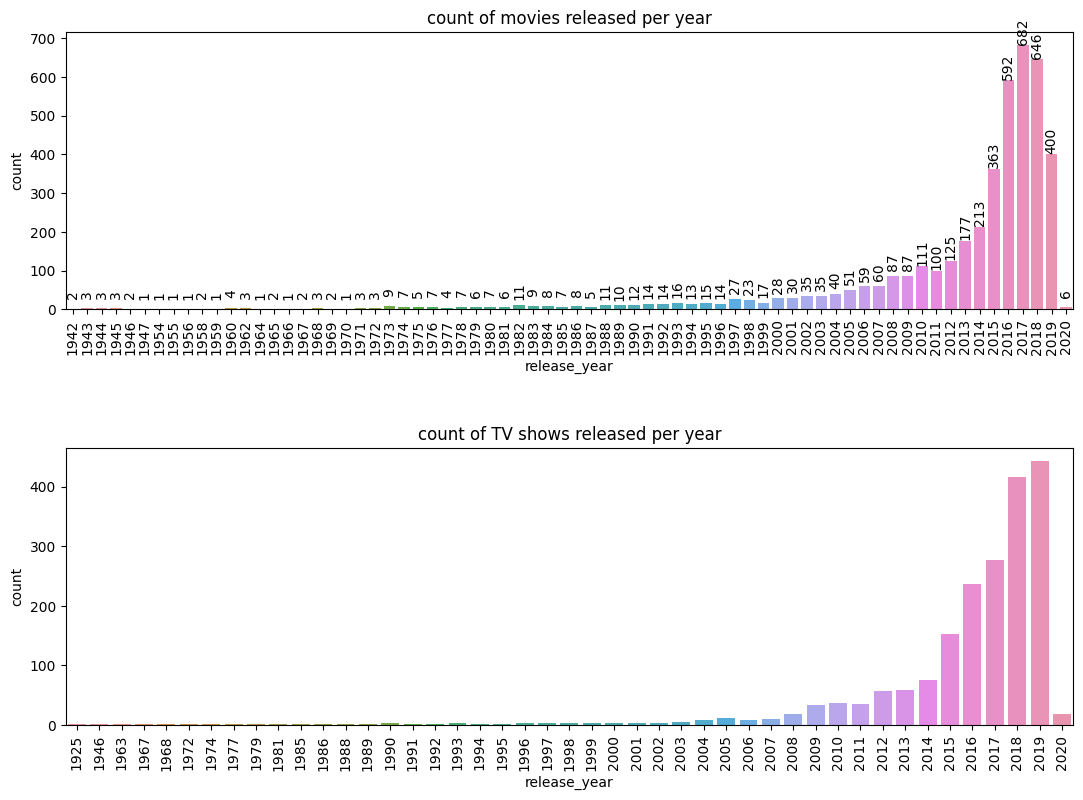

In [238]:
#visulaizing  release year of movies and tv shows
plt.figure(figsize=(13,9))
plt.subplot(2,1,1)
plot=sns.countplot(x="release_year",data=movies)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=90)
plt.xticks(rotation=90)
plt.title("count of movies released per year")

plt.subplot(2,1,2)
plot=sns.countplot(x="release_year",data=TVshows)
plt.xticks(rotation=90)
plt.title("count of TV shows released per year")
plt.subplots_adjust(hspace=0.5)
plt.show()

In [239]:
top_categories = df['listed_in'].value_counts().head(10)

In [240]:
#visualizing top 10 categories of TV shows
top_categories = TVshows['listed_in'].value_counts().head(10).reset_index(name='count')

fig = px.treemap(data_frame=top_categories, path=["listed_in"], values='count',
                 width=800, height=400, title="Top 10 TVs shows Categories")

fig.show()


In [241]:
#visualizing top 10 categories of movies
top_categories = movies['listed_in'].value_counts().head(10).reset_index(name='count')

fig = px.treemap(data_frame=top_categories, path=["listed_in"], values='count',
                 width=800, height=400, title="Top 10 movies Categories")

fig.show()


In [242]:
countries=df["country"].value_counts()
countries

country
United States                                    2500
India                                             777
United Kingdom                                    347
Japan                                             175
Canada                                            141
                                                 ... 
India, Japan                                        1
Norway, Germany, Sweden                             1
United Kingdom, Canada, France, United States       1
United Arab Emirates, Jordan                        1
Cyprus, Austria, Thailand                           1
Name: count, Length: 554, dtype: int64

In [243]:
top_Movie_Countries=movies["country"].value_counts().head(20)
px.bar(top_Movie_Countries, color=top_Movie_Countries.index, title="Top 10 Countries Contributing to Movies")


In [244]:
top_TVshow_Countries=TVshows["country"].value_counts().head(20)
px.bar(top_TVshow_Countries, color=top_TVshow_Countries.index, title="Top 10 Countries Contributing to TV Shows")

<Axes: title={'center': 'Top 10 Directors contributing to movies'}>

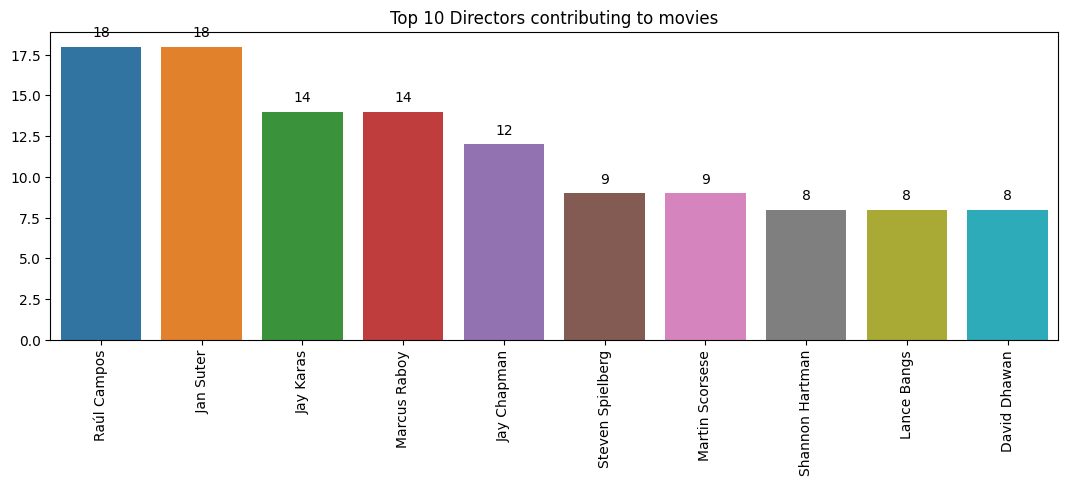

In [245]:
#top_10_directors contributing to movies
director_split=movies["director"].str.split(",")
all_directors=[]
for director in director_split:
    all_directors.extend(director)

director_count=pd.Series(all_directors).value_counts()
director_count=director_count[director_count.index!="unknown"]
top_10_directors=director_count.head(10)
plt.figure(figsize=(13, 4))
plot=sns.barplot(x=top_10_directors.index, y=top_10_directors.values)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90)
plt.title("Top 10 Directors contributing to movies")

plot

<Axes: title={'center': 'Top 10 Directors contributing to TV shows'}>

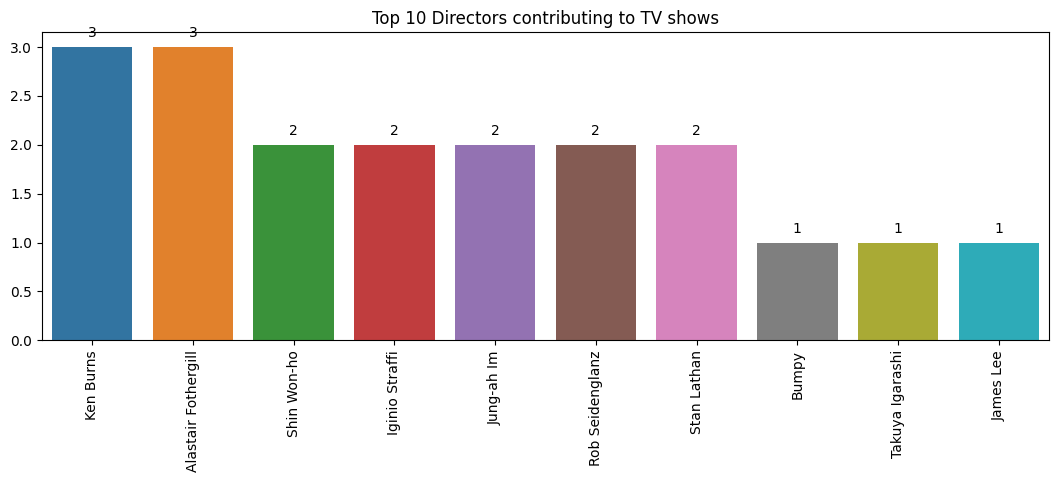

In [246]:
#top_10_directors contributing to TV shows
director_split=TVshows["director"].str.split(",")
all_directors=[]
for director in director_split:
    all_directors.extend(director)

director_count=pd.Series(all_directors).value_counts()
director_count=director_count[director_count.index!="unknown"]
top_10_directors=director_count.head(10)
plt.figure(figsize=(13, 4))
plot=sns.barplot(x=top_10_directors.index, y=top_10_directors.values)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90)
plt.title("Top 10 Directors contributing to TV shows")
plot

In [247]:
px.pie(data_frame=TVshows, names=TVshows["duration"].value_counts().index, values=TVshows["duration"].value_counts().values, title="TV shows duration")

In [248]:
movies["duration"]=pd.to_numeric(movies["duration"].str.split( ).str[0])

C:\Users\arsla\AppData\Local\Temp\ipykernel_11552\232227253.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [249]:

#creating bins for duration
bin_edges = [0, 30, 60, 120, 180, 240, 300, 360]
bin_labels = ["half_an_hour", "one_hour", "one_and_half_hour", "two_hours", "two_and_half_hours", "three_hours", "three_and_half_hours"]

movies['bins'] = pd.cut(movies['duration'], bins=bin_edges, labels=bin_labels)
fig = px.pie(data_frame=movies, names=movies["bins"].value_counts().index,
             values=movies["bins"].value_counts().values, title="TV shows duration")

fig.show()


C:\Users\arsla\AppData\Local\Temp\ipykernel_11552\3962064536.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Most of the shows are of `one_and_half_an_hour` hour duration.**

**I hope this analysis helps you.**